### Data Preparation: 

In preparation step, we load two files of datases. then, concatenate the training and validation set into one dataset for subsequent analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Arcene datasets
# Replace 'path/to/' with the actual path to your data files
train_data = pd.read_csv('arcene_train.data', header=None, sep=' ')
train_labels = pd.read_csv('arcene_train.labels', header=None)
valid_data = pd.read_csv('arcene_valid.data', header=None, sep=' ')
valid_labels = pd.read_csv('arcene_valid.labels', header=None)

# Combine training and validation sets
X = pd.concat([train_data, valid_data], axis=0)
y = pd.concat([train_labels, valid_labels], axis=0)[0].values

# Remove any columns with missing or invalid data
X = X.dropna(axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data loaded and preprocessed.")
#print("Scaled data shape:", X_scaled.shape)

Data loaded and preprocessed.


### PCA

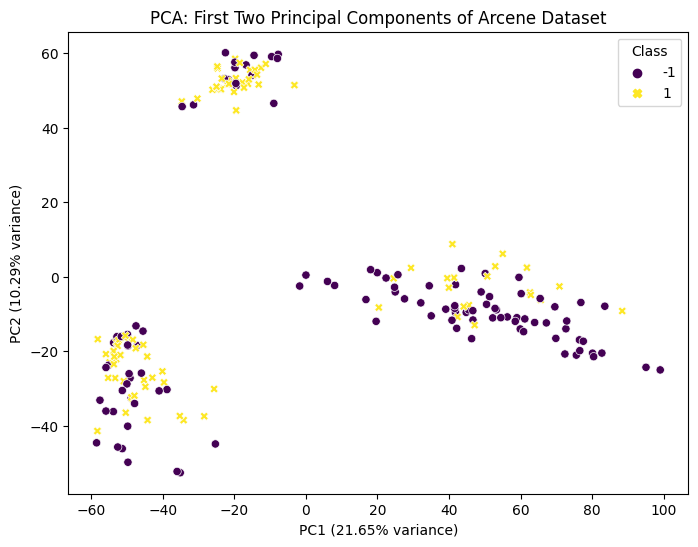

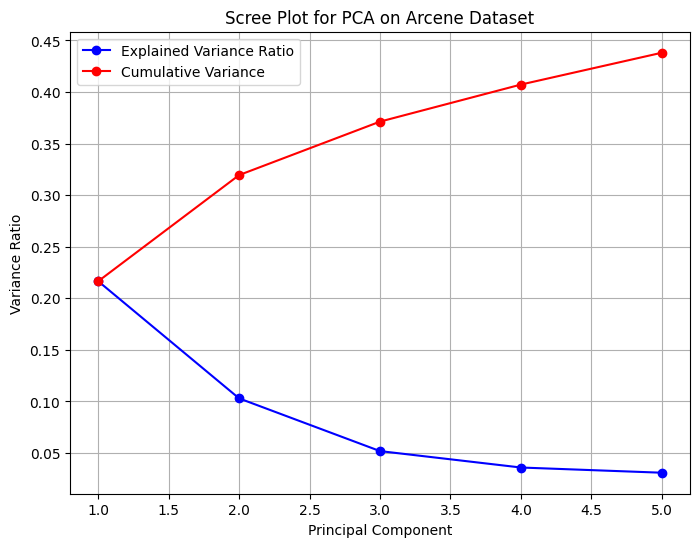

Number of PCA components: 5
Explained variance by PC1: 21.65%
Explained variance by PC2: 10.29%
Explained variance by PC3: 5.18%
Explained variance by PC4: 3.59%
Explained variance by PC5: 3.09%
Total variance by first two PCs: 31.94%
Total variance by 5 PCs: 43.80%


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA
n_components = 5  # Number if components.
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot 1: 2D scatter plot of first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', style=y)
plt.title('PCA: First Two Principal Components of Arcene Dataset')
plt.xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% variance)')
plt.legend(title='Class', loc='best')
plt.savefig('pca_plot.png')
plt.show()
plt.close()

# Plot 2: Scree plot for explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-', label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', label='Cumulative Variance')
plt.title('Scree Plot for PCA on Arcene Dataset')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()
#plt.savefig('scree_plot.png')
plt.close()

# Print explained variance for first two components
print(f"Number of PCA components: {n_components}")
for i, var in enumerate(explained_variance_ratio, 1):
    print(f"Explained variance by PC{i}: {var*100:.2f}%")
print(f"Total variance by first two PCs: {cumulative_variance[1]*100:.2f}%")
print(f"Total variance by {n_components} PCs: {cumulative_variance[4]*100:.2f}%")

#print(f"Explained variance by PC1: {explained_variance_ratio[0]*100:.2f}%")
#print(f"Explained variance by PC2: {explained_variance_ratio[1]*100:.2f}%")
#print(f"Total variance by first two PCs: {cumulative_variance[1]*100:.2f}%")

### Classical Manifold (Isomap):

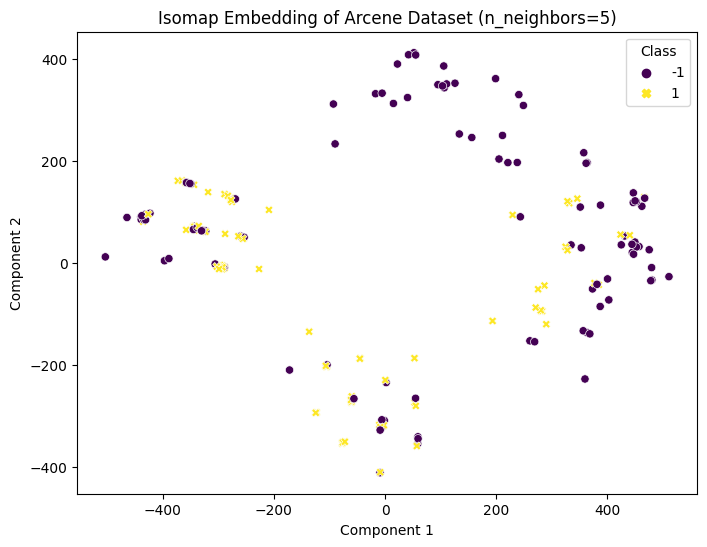

In [10]:
import warnings
warnings.filterwarnings('ignore')  # Disable all warnings

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Editable parameters
n_neighbors = 5  # Number of neighbors for Isomap
n_components = 2  # Number of components for Isomap (2D embedding)

# Apply Isomap
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
X_isomap = isomap.fit_transform(X_scaled)

# Plot: 2D scatter plot of Isomap embedding
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_isomap[:, 0], y=X_isomap[:, 1], hue=y, palette='viridis', style=y)
plt.title(f'Isomap Embedding of Arcene Dataset (n_neighbors={n_neighbors})')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Class', loc='best')
plt.savefig('isomap_plot.png', dpi=300)
plt.show()
plt.close()

Compare ( PCA ) and ( Isomap ):

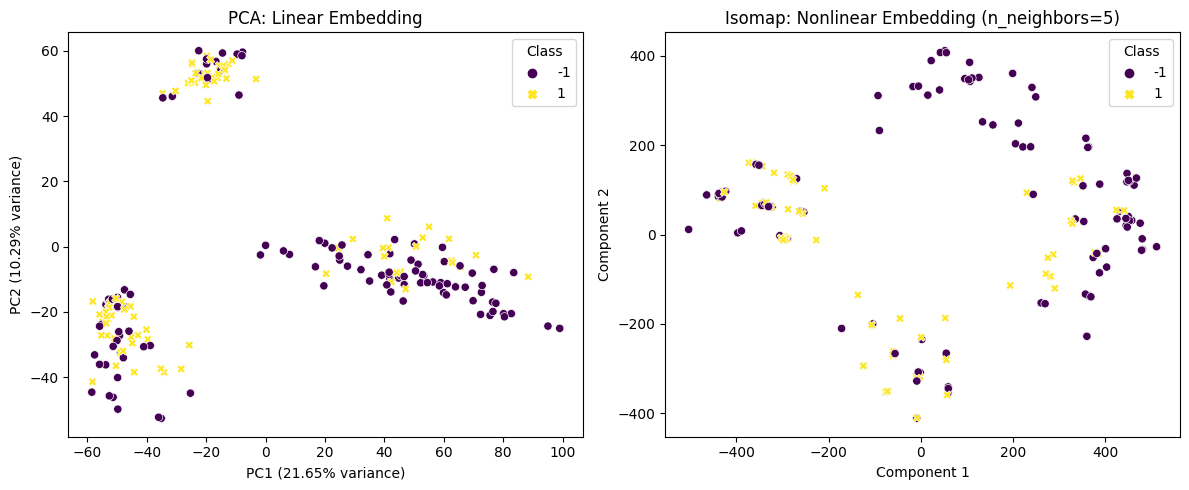

PCA Explained Variance (PC1): 21.65%
PCA Explained Variance (PC2): 10.29%
PCA Total Variance (PC1+PC2): 31.94%
Isomap Reconstruction Error (MSE): 139635.6888


In [12]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
pca_explained_variance = pca.explained_variance_ratio_

# Apply Isomap
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
X_isomap = isomap.fit_transform(X_scaled)

# Compute Isomap reconstruction error
# Note: Isomap doesn't directly provide reconstruction, so we approximate using distance preservation
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import cdist
original_distances = cdist(X_scaled, X_scaled, metric='euclidean')
isomap_distances = cdist(X_isomap, X_isomap, metric='euclidean')
isomap_reconstruction_error = mean_squared_error(original_distances.flatten(), isomap_distances.flatten())

# Plot 1: PCA scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', style=y)
plt.title('PCA: First Two Principal Components of Arcene Dataset')
plt.xlabel(f'PC1 ({pca_explained_variance[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca_explained_variance[1]*100:.2f}% variance)')
plt.legend(title='Class', loc='best')
plt.savefig('pca_plot.png', dpi=300)
plt.close()

# Plot 2: Isomap scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_isomap[:, 0], y=X_isomap[:, 1], hue=y, palette='viridis', style=y)
plt.title(f'Isomap Embedding of Arcene Dataset (n_neighbors={n_neighbors})')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Class', loc='best')
plt.savefig('isomap_plot.png', dpi=300)
plt.close()

# Plot 3: Side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', style=y, ax=ax1)
ax1.set_title('PCA: Linear Embedding')
ax1.set_xlabel(f'PC1 ({pca_explained_variance[0]*100:.2f}% variance)')
ax1.set_ylabel(f'PC2 ({pca_explained_variance[1]*100:.2f}% variance)')
ax1.legend(title='Class')

sns.scatterplot(x=X_isomap[:, 0], y=X_isomap[:, 1], hue=y, palette='viridis', style=y, ax=ax2)
ax2.set_title(f'Isomap: Nonlinear Embedding (n_neighbors={n_neighbors})')
ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.legend(title='Class')

plt.tight_layout()
plt.savefig('comparison_plot.png', dpi=300)
plt.show()
plt.close()

# Print metrics for comparison
print(f"PCA Explained Variance (PC1): {pca_explained_variance[0]*100:.2f}%")
print(f"PCA Explained Variance (PC2): {pca_explained_variance[1]*100:.2f}%")
print(f"PCA Total Variance (PC1+PC2): {sum(pca_explained_variance)*100:.2f}%")
print(f"Isomap Reconstruction Error (MSE): {isomap_reconstruction_error:.4f}")

### Modern Manifold Learning: 

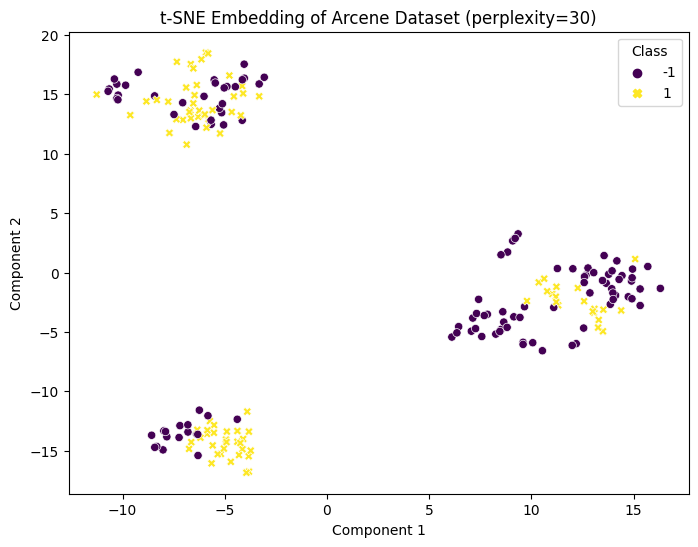

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# ------------------- t-SNE PARAMETER: --------------------------
# Editable parameters for t-SNE 
perplexity = 30  # Perplexity for t-SNE
n_components = 2  # Number of components for t-SNE (2D embedding)

# Apply t-SNE
tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot: 2D scatter plot of t-SNE embedding
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis', style=y)
plt.title(f't-SNE Embedding of Arcene Dataset (perplexity={perplexity})')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Class', loc='best')
plt.savefig('tsne_plot.png', dpi=300)
plt.show()
plt.close()